[Introduction to Tidy Finance]('https://www.tidy-finance.org/python/introduction-to-tidy-finance.html')

### Working with Stock Market Data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
df =yf.download(
    tickers= 'GM',
    start= "2000-01-01", 
    end="2024-05-31",
    progress= False)

In [16]:
df = (df.reset_index().assign(symbol="AAPL") 
       .rename(columns={
            "Date": "date", 
            "Open": "open", 
            "High": "high",
            "Low": "low",
            "Close": "close", 
            "Adj Close": "adjusted", 
            "Volume": "volume"})
)

df.head(2).round(3)

,date,open,high,low,close,adjusted,volume,symbol
0,2010-11-18,35.00,35.99,33.89,34.19,25.951,457044300,AAPL
1,2010-11-19,34.15,34.50,33.11,34.26,26.004,107842000,AAPL


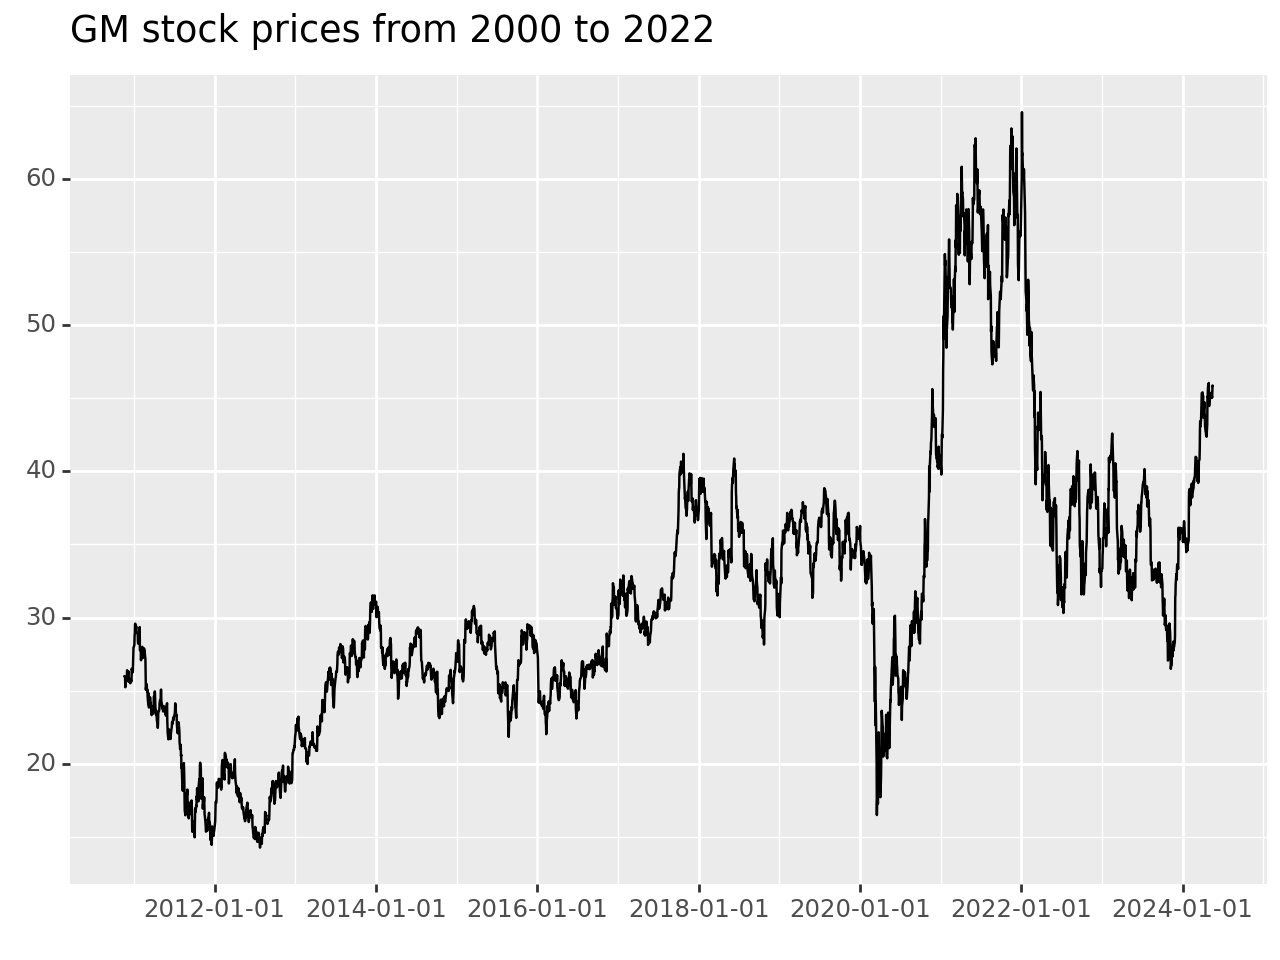

In [5]:
from plotnine import *
f = (
  ggplot(df, aes(y="adjusted", x="date")) +
  geom_line() +
  labs(x="", y="", title="GM stock prices from 2000 to 2022")
)

f.draw()

### Converting DataFrames into R objects

In [75]:
import rpy2
# Jupyterのセルに、以下のコードを記載しておくだけ。
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [24]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


##### %R -i で、Python上のデータをRへ渡します

In [76]:
%R -i df 
%R r_df <- df
%R head(r_df, 3)

,date,open,high,low,close,adjusted,volume,symbol
0,2010-11-18 00:00:00+09:00,35.000000,35.990002,33.889999,34.189999,25.950752,457044300,AAPL
1,2010-11-19 00:00:00+09:00,34.150002,34.500000,33.110001,34.259998,26.003880,107842000,AAPL
2,2010-11-22 00:00:00+09:00,34.200001,34.480000,33.810001,34.080002,25.867262,36650600,AAPL


#### %R -o で、R上のデータをPythonへ渡します

In [77]:
%R -o r_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      3396 non-null   datetime64[ns]
 1   open      3396 non-null   float64       
 2   high      3396 non-null   float64       
 3   low       3396 non-null   float64       
 4   close     3396 non-null   float64       
 5   adjusted  3396 non-null   float64       
 6   volume    3396 non-null   int64         
 7   symbol    3396 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 212.4+ KB


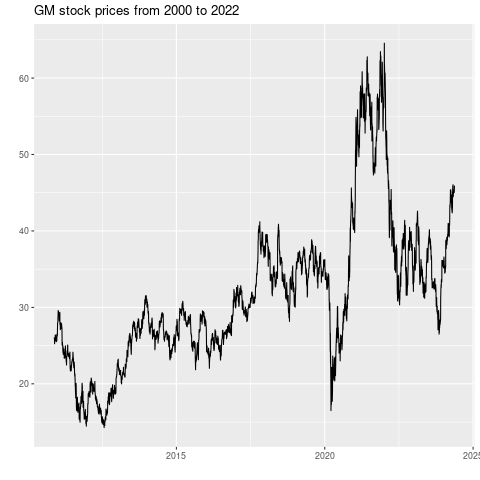

In [40]:
%%R 
library(ggplot2)
ggplot(data = r_df, aes(date, adjusted)) +
geom_line() +
labs(title = "GM stock prices from 2000 to 2022")


In [54]:
returns = (df
  .sort_values("date")
  .assign(ret = lambda x: x["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
)
returns.head(2)

,symbol,date,ret
0,AAPL,2010-11-18,NaN
1,AAPL,2010-11-19,0.002047


In [78]:
returns = returns.dropna() 
returns.head(2)

,symbol,date,ret
1,AAPL,2010-11-19,0.002047
2,AAPL,2010-11-22,-0.005254


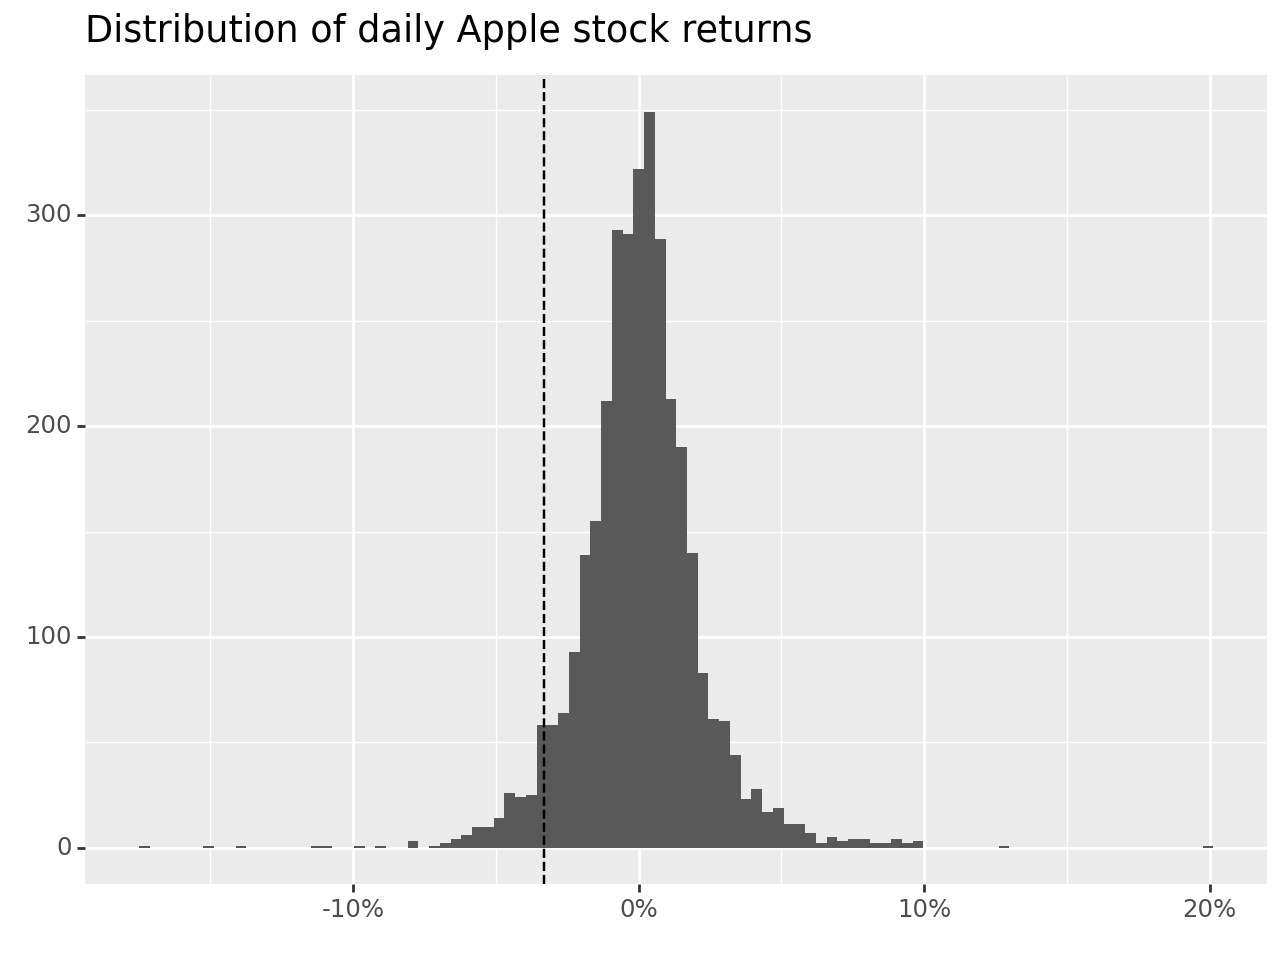

In [56]:
from mizani.formatters import percent_format

quantile_05 = returns["ret"].quantile(0.05)

returns_figure = (
  ggplot(returns, aes(x="ret")) +
  geom_histogram(bins=100) +
  geom_vline(aes(xintercept=quantile_05), 
                 linetype="dashed") +
  labs(x="", y="",
       title="Distribution of daily Apple stock returns") +
  scale_x_continuous(labels=percent_format())
)
returns_figure.draw()

In [58]:
%R -i returns
%R r_returns <- returns

,symbol,date,ret
1,AAPL,2010-11-19 00:00:00+09:00,0.002047
2,AAPL,2010-11-22 00:00:00+09:00,-0.005254
3,AAPL,2010-11-23 00:00:00+09:00,-0.024355
4,AAPL,2010-11-24 00:00:00+09:00,0.006917
5,AAPL,2010-11-26 00:00:00+09:00,0.009558
...,...,...,...
3391,AAPL,2024-05-13 00:00:00+09:00,-0.000885
3392,AAPL,2024-05-14 00:00:00+09:00,-0.003099
3393,AAPL,2024-05-15 00:00:00+09:00,0.010215
3394,AAPL,2024-05-16 00:00:00+09:00,0.008353


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-17.32285  -1.04237   0.05251   0.03996   1.10799  19.94317 


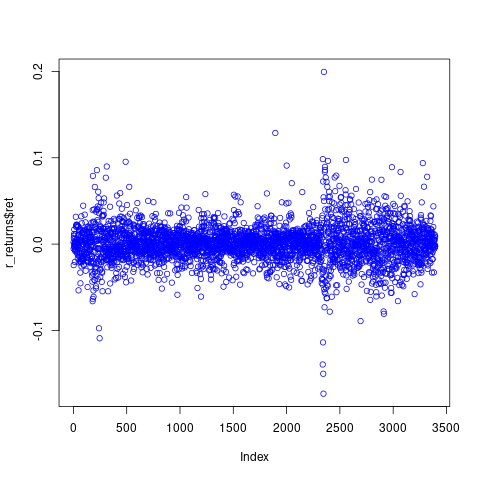

In [65]:
%%R
plot(r_returns$ret, col = 'blue')
summary(r_returns$ret*100)

In [69]:
%%R 
r_returns |> select(ret) |> summary()

      ret            
 Min.   :-0.1732285  
 1st Qu.:-0.0104237  
 Median : 0.0005251  
 Mean   : 0.0003996  
 3rd Qu.: 0.0110799  
 Max.   : 0.1994317  


In [63]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,3395.0,0.0,0.022,-0.173,-0.01,0.001,0.011,0.199


In [40]:
returns["ret"].describe().round(3).T

count    3395.000
mean        0.000
std         0.022
min        -0.173
25%        -0.010
50%         0.001
75%         0.011
max         0.199
Name: ret, dtype: float64

In [42]:
(returns["ret"]
  .groupby(returns["date"].dt.year)
  .describe()
  .round(3)
)[0:3]

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2010,29.0,0.003,0.012,-0.024,-0.004,0.001,0.010,0.032
2011,252.0,-0.002,0.025,-0.109,-0.017,-0.001,0.014,0.086
2012,250.0,0.002,0.021,-0.055,-0.012,-0.002,0.013,0.095


### ARIMAモデルの自動構築  By R
学習データ（train）をR用の時系列データに変換

In [73]:
%%R
# loading forecast package
library('forecast')

# ARIMAモデルを自動構築
r_ts_data = ts(r_returns$ret)
arima_model <- auto.arima(r_ts_data, trace = TRUE)
arima_model


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : -16411.19
 ARIMA(1,0,0) with non-zero mean : -16408.31
 ARIMA(0,0,1) with non-zero mean : -16409.3
 ARIMA(0,0,0) with zero mean     : -16412.03
 ARIMA(1,0,1) with non-zero mean : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,0,0) with zero mean     : -16412.03

 Best model: ARIMA(0,0,0) with zero mean     

Series: r_ts_data 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0004654:  log likelihood = 8207.02
AIC=-16412.03   AICc=-16412.03   BIC=-16405.9


In [74]:
%%R

# 学習データの予測値（推定値）を出力
arima_model$fitted

Time Series:
Start = 1 1 
End = 3395 
Frequency = 1 
   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

###  Scaling Up the Analysis  
perform the analysis with data from all current constituents of the Dow Jones Industrial Average index.

In [46]:
url = ("https://www.ssga.com/us/en/institutional/etfs/library-content/"
       "products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx")

symbols = (pd.read_excel(url, skiprows=4, nrows=30)
  .get("Ticker")
  .tolist()
)
symbols

['UNH',
 'GS',
 'MSFT',
 'CAT',
 'HD',
 'AMGN',
 'CRM',
 'V',
 'MCD',
 'AXP',
 'TRV',
 'HON',
 'JPM',
 'AAPL',
 'AMZN',
 'BA',
 'IBM',
 'PG',
 'CVX',
 'JNJ',
 'MRK',
 'MMM',
 'DIS',
 'NKE',
 'WMT',
 'KO',
 'DOW',
 'CSCO',
 'VZ',
 'INTC']

In [57]:
index_prices = (yf.download(
    tickers=symbols, 
    start="2000-01-01", 
    end="2022-12-31", 
    progress=False
  ))

index_prices = (index_prices
  .stack()
  .reset_index(level=1, drop=False)
  .reset_index()
  .rename(columns={
    "Date": "date",
    "level_1": "symbol",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Adj Close": "adjusted",
    "Volume": "volume"}
  )
)
index_prices.head(5)

,date,symbol,adjusted,close,high,low,open,volume
0,2000-01-03,AAPL,0.844981,0.999442,1.004464,0.907924,0.936384,535796800.0
1,2000-01-03,AMGN,44.925072,62.937500,70.000000,62.875000,70.000000,22914900.0
2,2000-01-03,AMZN,4.468750,4.468750,4.478125,3.952344,4.075000,322352000.0
3,2000-01-03,AXP,32.854736,45.880306,47.995617,45.515598,47.995617,6471267.0
4,2000-01-03,BA,25.940273,40.187500,41.687500,39.812500,41.437500,2638200.0


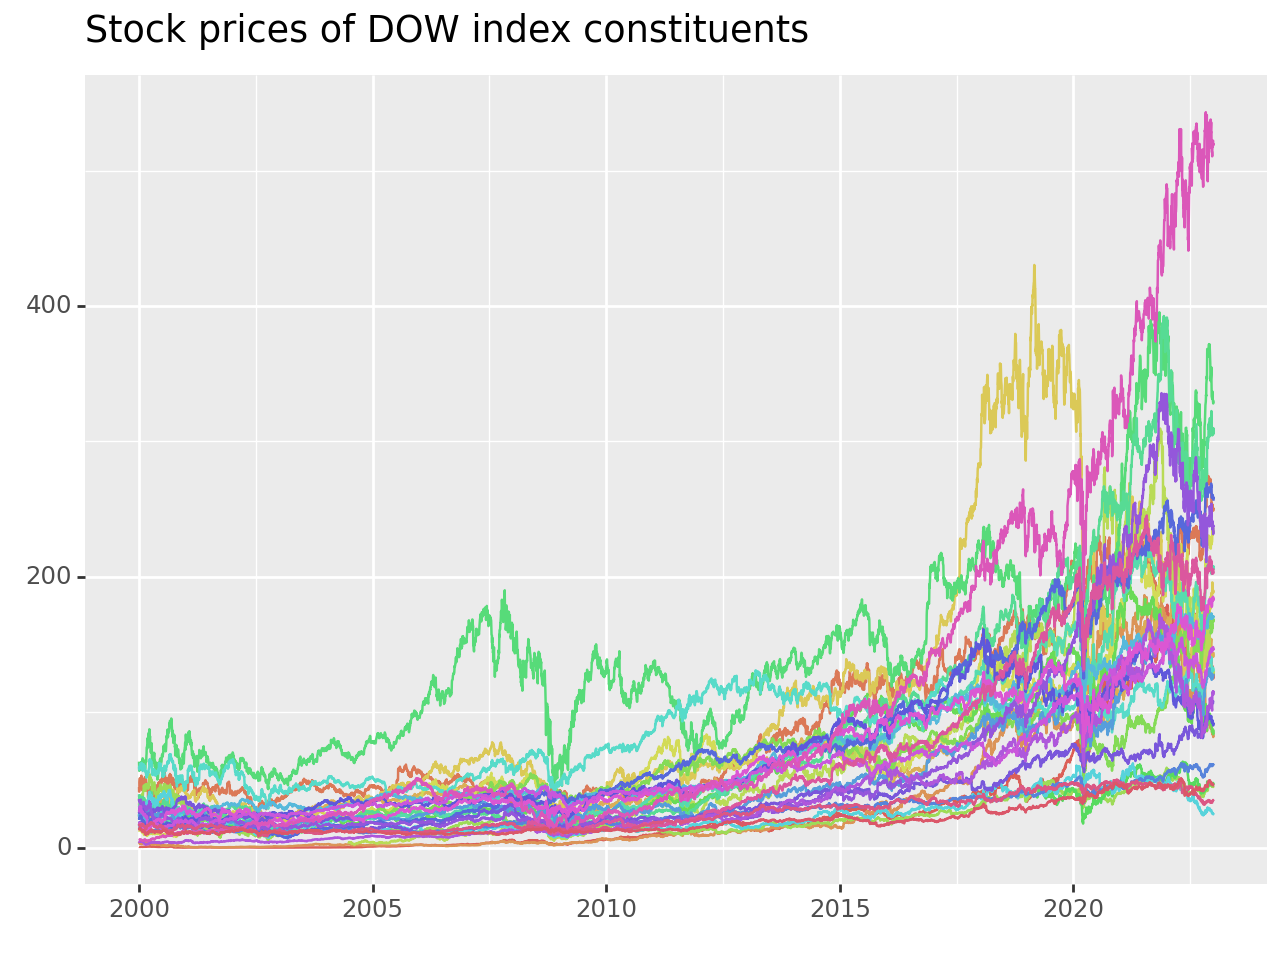

In [58]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

index_prices_figure = (
  ggplot(index_prices, aes(y="adjusted", x="date", color="symbol")) +
  geom_line() + labs(x="", y="", color="", title="Stock prices of DOW index constituents") +
  theme(legend_position="none") +
  scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)
index_prices_figure.draw()

In [66]:
all_returns = (index_prices
  .assign(ret=lambda x: x.groupby("symbol")["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
  .dropna(subset="ret")
)

(all_returns
  .groupby("symbol")["ret"]
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,5786.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
AMGN,5786.0,0.000,0.020,-0.134,-0.009,0.000,0.009,0.151
AMZN,5786.0,0.001,0.032,-0.248,-0.012,0.000,0.014,0.345
AXP,5786.0,0.001,0.023,-0.176,-0.009,0.000,0.010,0.219
BA,5786.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
CAT,5786.0,0.001,0.020,-0.145,-0.010,0.001,0.011,0.147
CRM,4664.0,0.001,0.027,-0.271,-0.012,0.000,0.014,0.260
CSCO,5786.0,0.000,0.024,-0.162,-0.009,0.000,0.010,0.244
CVX,5786.0,0.001,0.018,-0.221,-0.008,0.001,0.009,0.227


### Other Forms of Data Aggregation

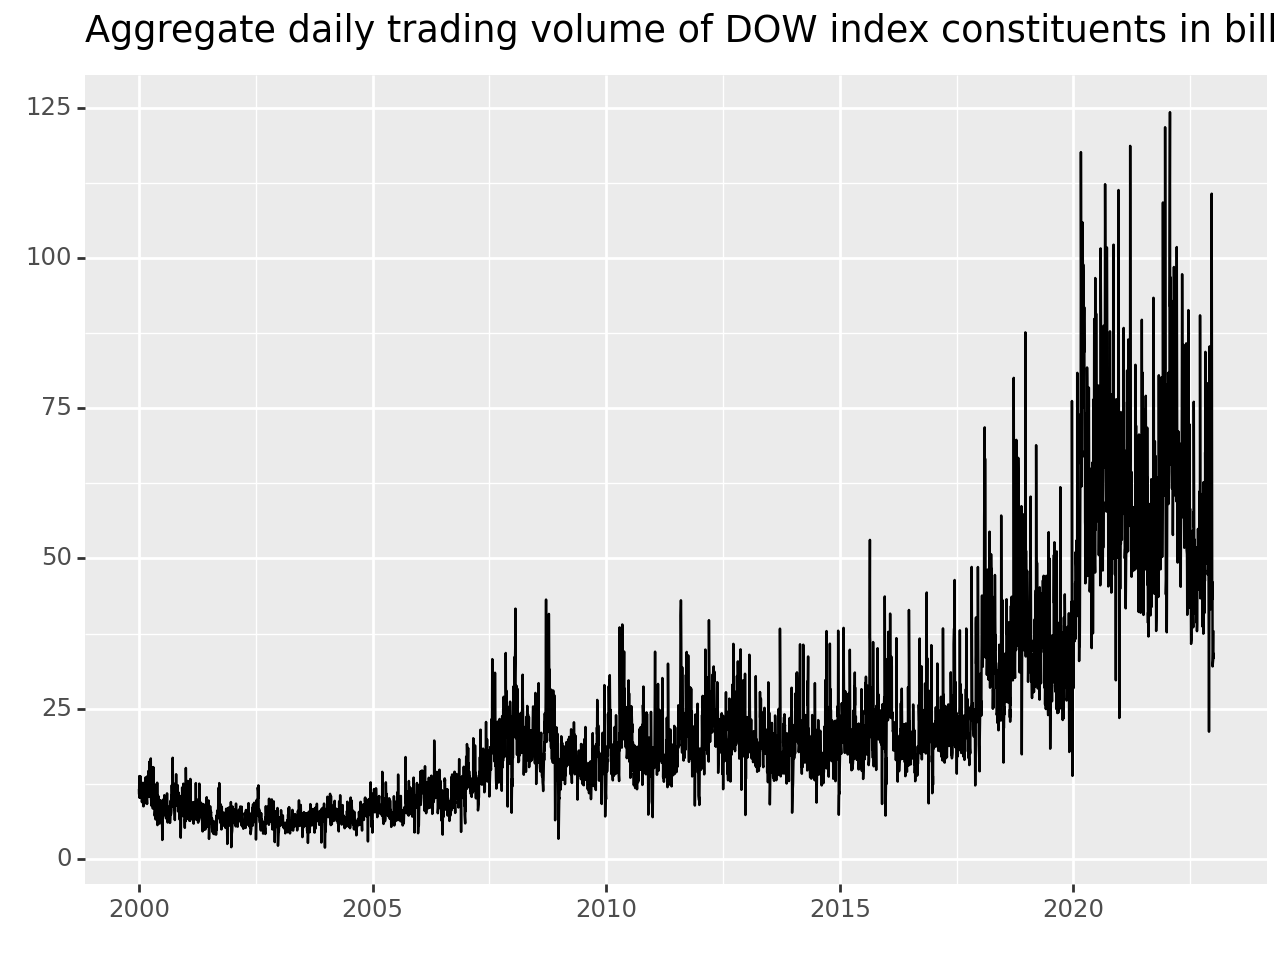

In [67]:
trading_volume = (index_prices
  .assign(trading_volume=lambda x: (x["volume"] * x["adjusted"]) / 1e9)
  .groupby("date")["trading_volume"]
  .sum()
  .reset_index()
  .assign(trading_volume_lag=lambda x: x["trading_volume"].shift(periods=1))
)

trading_volume_figure = (
  ggplot(trading_volume, 
          aes(x="date", y="trading_volume")) +
  geom_line() +
  labs(x="", y="",
       title=("Aggregate daily trading volume of DOW index constituents "
              "in billion USD"))  +
 scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)
trading_volume_figure.draw()

/home/bayes/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


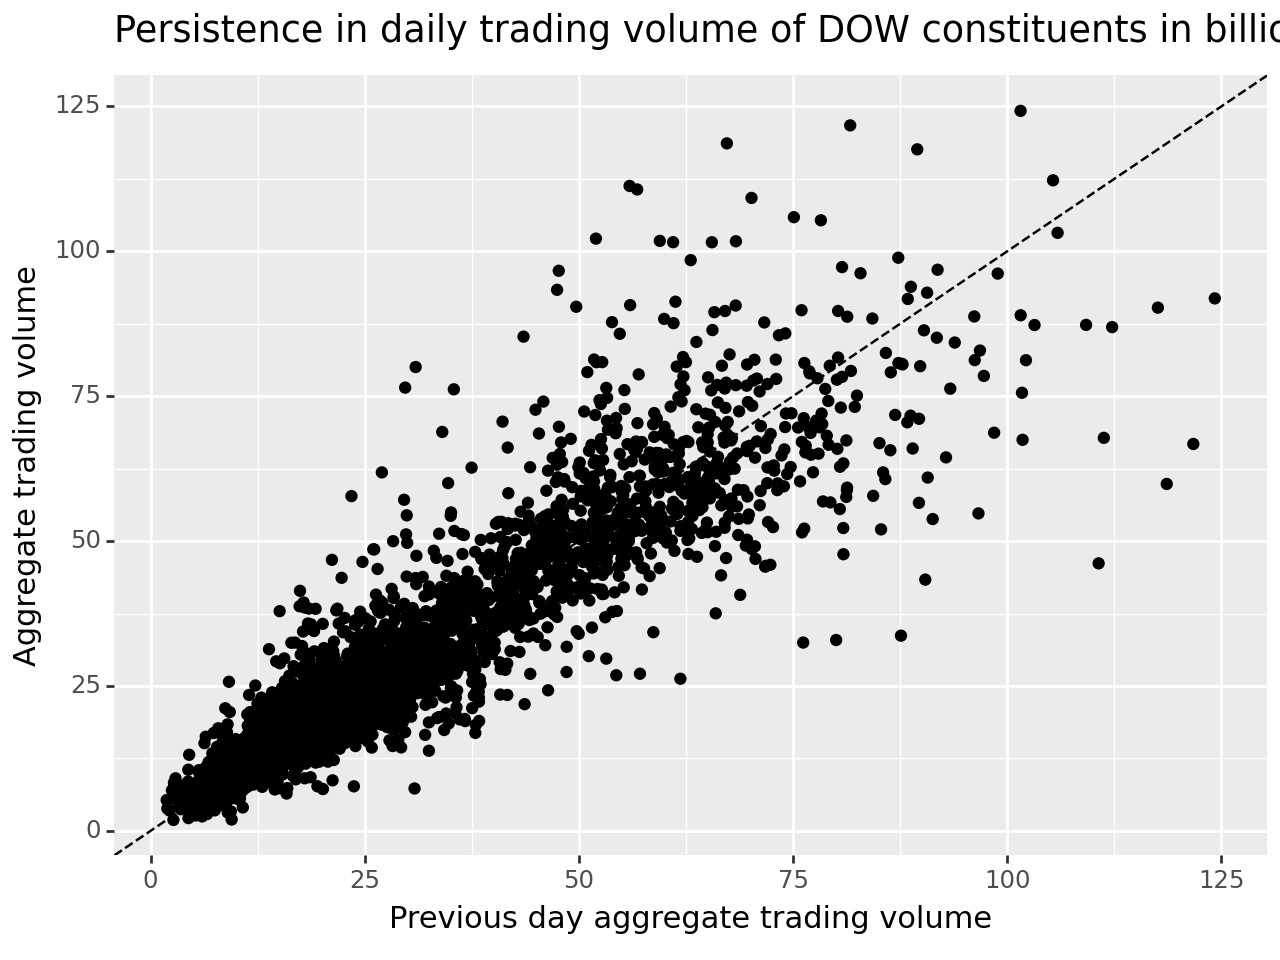

In [68]:
trading_volume_figure = (
  ggplot(trading_volume, 
         aes(x="trading_volume_lag", y="trading_volume")) +
  geom_point() +
  geom_abline(aes(intercept=0, slope=1), linetype="dashed") +
  labs(x="Previous day aggregate trading volume",
       y="Aggregate trading volume",
       title=("Persistence in daily trading volume of DOW constituents "
              "in billion USD"))
)
trading_volume_figure.draw()

In [70]:
prices = (index_prices
  .groupby("symbol")
  .apply(lambda x: x.assign(counts=x["adjusted"].dropna().count()))
  .reset_index(drop=True)
  .query("counts == counts.max()")
)
prices.head(3)

,date,symbol,adjusted,close,high,low,open,volume,counts
0,2000-01-03,AAPL,0.844981,0.999442,1.004464,0.907924,0.936384,535796800.0,5787
1,2000-01-04,AAPL,0.773740,0.915179,0.987723,0.903460,0.966518,512377600.0,5787
2,2000-01-05,AAPL,0.785063,0.928571,0.987165,0.919643,0.926339,778321600.0,5787


In [71]:
returns_matrix = (prices
  .pivot(columns="symbol", values="adjusted", index="date")
  .resample("m")
  .last()
  .pct_change()
  .dropna()
)
mu = np.array(returns_matrix.mean()).T
sigma = np.array(returns_matrix.cov())

In [72]:
N = returns_matrix.shape[1]
iota = np.ones(N)
sigma_inv = np.linalg.inv(sigma) 

mvp_weights = sigma_inv @ iota
mvp_weights = mvp_weights/mvp_weights.sum()
mvp_return = mu.T @ mvp_weights
mvp_volatility = np.sqrt(mvp_weights.T @ sigma @ mvp_weights)
mvp_moments = pd.DataFrame({"value": [mvp_return, mvp_volatility]},
                           index=["average_ret", "volatility"])
mvp_moments.round(3)

,value
average_ret,0.008
volatility,0.032


In [73]:
benchmark_multiple = 3
mu_bar = benchmark_multiple*mvp_return
C = iota.T @ sigma_inv @ iota
D = iota.T @ sigma_inv @ mu
E = mu.T @ sigma_inv @ mu
lambda_tilde = 2*(mu_bar-D/C)/(E-D**2/C)
efp_weights = mvp_weights+lambda_tilde/2*(sigma_inv @ mu-D*mvp_weights)

### The Efficient Frontier

In [74]:
length_year = 12
a = np.arange(-0.4, 2.0, 0.01)
res = pd.DataFrame(columns=["mu", "sd"], index=a).astype(float)

for i in a:
    w = (1-i)*mvp_weights+i*efp_weights
    res.loc[i, "mu"] = (w.T @ mu)*length_year
    res.loc[i, "sd"] = np.sqrt(w.T @ sigma @ w)*np.sqrt(length_year)

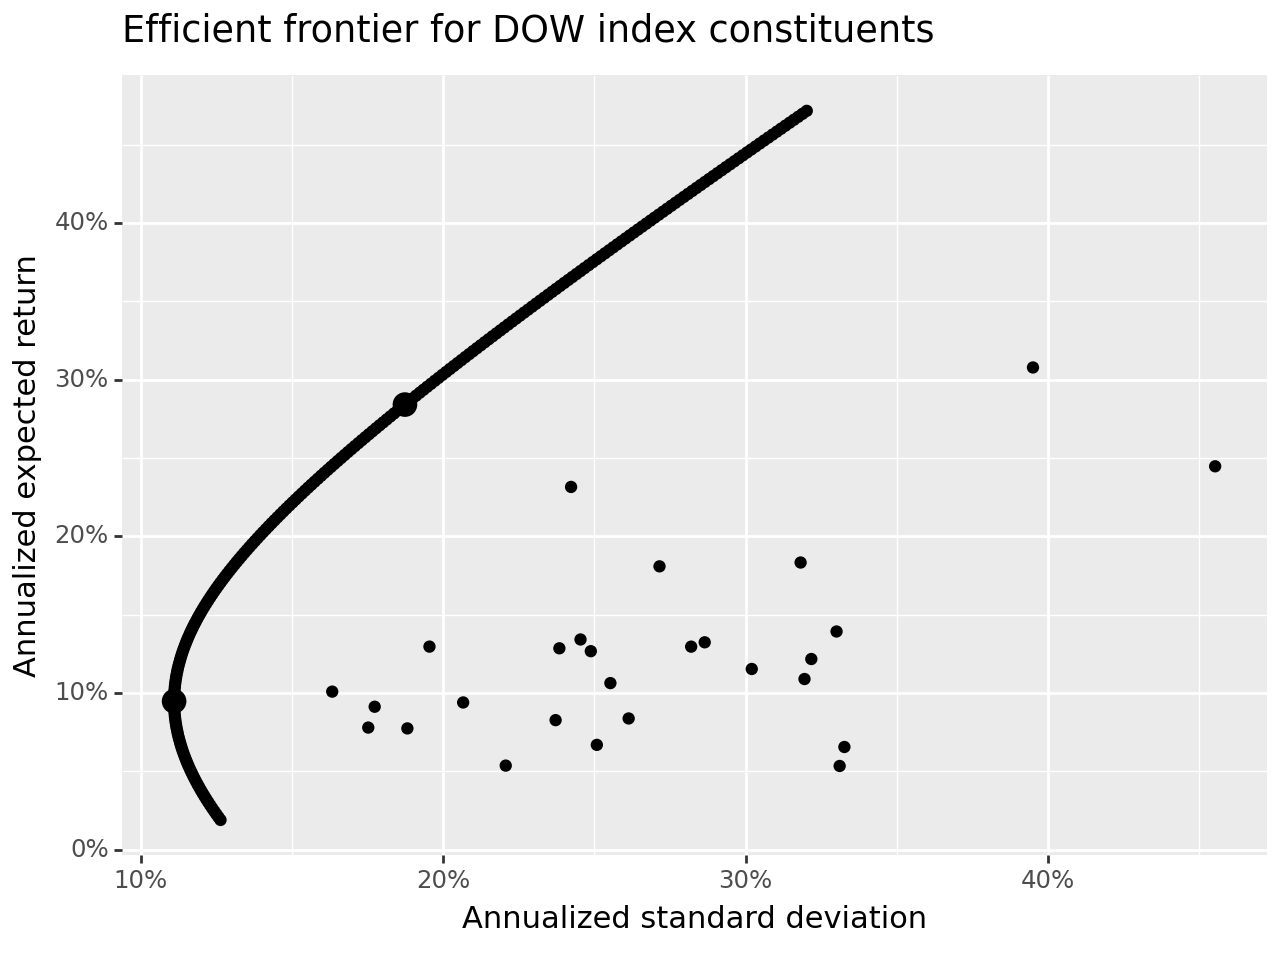

In [75]:
mvp_return = (mu.T @ mvp_weights)*length_year
mvp_volatility = (np.sqrt(mvp_weights.T @ sigma @ mvp_weights)* 
                  np.sqrt(length_year))
efp_return = mu_bar*length_year
efp_volatility = (np.sqrt(efp_weights.T @ sigma @ efp_weights)* 
                  np.sqrt(length_year))

res_figure = (
  ggplot(res, aes(x="sd", y="mu")) +
  geom_point() +
  geom_point(
    pd.DataFrame({"mu": [mvp_return, efp_return],
                  "sd": [mvp_volatility, efp_volatility]}),
    size=4
  ) +
  geom_point(
    pd.DataFrame({"mu": mu*length_year,
                  "sd": np.sqrt(np.diag(sigma))*np.sqrt(length_year)})
  ) +
  labs(x="Annualized standard deviation",
       y="Annualized expected return",
       title="Efficient frontier for DOW index constituents") +
  scale_x_continuous(labels=percent_format()) +
  scale_y_continuous(labels=percent_format())
)
res_figure.draw()